In [1]:
# Group Assignment Part II

In [2]:
## Individual - John Parks: Census Data Race and Social Vulnerability

In [3]:
import pandas as pd

In [8]:
import geopandas as gpd

In [9]:
### Importing Data

In [11]:
race = pd.read_csv('census.csv')

In [12]:
race.info

<bound method DataFrame.info of         Geo_FIPS                                          Geo_QName  \
0     6037101110  Census Tract 1011.10, Los Angeles County, Cali...   
1     6037101122  Census Tract 1011.22, Los Angeles County, Cali...   
2     6037101220  Census Tract 1012.20, Los Angeles County, Cali...   
3     6037101221  Census Tract 1012.21, Los Angeles County, Cali...   
4     6037101222  Census Tract 1012.22, Los Angeles County, Cali...   
...          ...                                                ...   
2493  6037980038  Census Tract 9800.38, Los Angeles County, Cali...   
2494  6037980039  Census Tract 9800.39, Los Angeles County, Cali...   
2495  6037990100  Census Tract 9901, Los Angeles County, California   
2496  6037990200  Census Tract 9902, Los Angeles County, California   
2497  6037990300  Census Tract 9903, Los Angeles County, California   

     Geo_FILEID Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  \
0         ACSSF         ca         140

In [13]:
###Data Checked

In [14]:
race.shape

(2498, 63)

In [15]:
race.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,Geo_BTBG,Geo_PLACESE,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008
0,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,...,NaN,NaN,3879,2709,11,6,405,0,266,482
1,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,...,NaN,NaN,4247,2980,99,0,607,0,245,316
2,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,...,NaN,NaN,3583,1978,8,90,341,0,607,559
3,6037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,NaN,NaN,NaN,...,NaN,NaN,3723,2545,97,0,209,0,668,204
4,6037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,NaN,NaN,NaN,...,NaN,NaN,2690,2404,17,0,131,57,42,39


In [16]:
## Organizing Data

In [17]:
### I need to trim and get a feel for the data in order to proceed 

In [18]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [19]:
race.sample()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_PUMA5,Geo_PUMA1,Geo_GEOID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008
1248,6037403324,"Census Tract 4033.24, Los Angeles County, Cali...",ACSSF,ca,140,0,5448,NaN,NaN,NaN,NaN,6,37,NaN,NaN,403324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037403324,Census Tract 4033.24,NaN,NaN,NaN,7121,948,455,82,5100,0,345,191


In [25]:
### Resetting Zeros and String

In [26]:
race.Geo_FIPS.head()

0    6037101110
1    6037101122
2    6037101220
3    6037101221
4    6037101222
Name: Geo_FIPS, dtype: int64

In [27]:
race.Geo_STATE.head()

0    6
1    6
2    6
3    6
4    6
Name: Geo_STATE, dtype: int64

In [28]:
race.Geo_COUNTY.head()

0    37
1    37
2    37
3    37
4    37
Name: Geo_COUNTY, dtype: int64

In [29]:
###Converting FIPS to String

In [30]:
race = pd.read_csv('census.csv',
                   dtype=
                   {'Geo_FIPS':str,
                    'Geo_STATE':str,
                    'Geo_COUNTY':str}
                  )

In [31]:
race.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_PUMA5,Geo_PUMA1,Geo_GEOID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,NaN,06,037,NaN,NaN,101110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101110,Census Tract 1011.10,NaN,NaN,NaN,3879,2709,11,6,405,0,266,482
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,NaN,06,037,NaN,NaN,101122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101122,Census Tract 1011.22,NaN,NaN,NaN,4247,2980,99,0,607,0,245,316
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,NaN,06,037,NaN,NaN,101220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101220,Census Tract 1012.20,NaN,NaN,NaN,3583,1978,8,90,341,0,607,559
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,NaN,NaN,NaN,NaN,06,037,NaN,NaN,101221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101221,Census Tract 1012.21,NaN,NaN,NaN,3723,2545,97,0,209,0,668,204
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,NaN,NaN,NaN,NaN,06,037,NaN,NaN,101222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101222,Census Tract 1012.22,NaN,NaN,NaN,2690,2404,17,0,131,57,42,39


In [32]:
race.columns

Index(['Geo_FIPS', 'Geo_QName', 'Geo_FILEID', 'Geo_STUSAB', 'Geo_SUMLEV',
       'Geo_GEOCOMP', 'Geo_LOGRECNO', 'Geo_US', 'Geo_REGION', 'Geo_DIVISION',
       'Geo_STATECE', 'Geo_STATE', 'Geo_COUNTY', 'Geo_COUSUB', 'Geo_PLACE',
       'Geo_TRACT', 'Geo_BLKGRP', 'Geo_CONCIT', 'Geo_AIANHH', 'Geo_AIANHHFP',
       'Geo_AIHHTLI', 'Geo_AITSCE', 'Geo_AITS', 'Geo_ANRC', 'Geo_CBSA',
       'Geo_CSA', 'Geo_METDIV', 'Geo_MACC', 'Geo_MEMI', 'Geo_NECTA',
       'Geo_CNECTA', 'Geo_NECTADIV', 'Geo_UA', 'Geo_UACP', 'Geo_CDCURR',
       'Geo_SLDU', 'Geo_SLDL', 'Geo_VTD', 'Geo_ZCTA3', 'Geo_ZCTA5',
       'Geo_SUBMCD', 'Geo_SDELM', 'Geo_SDSEC', 'Geo_SDUNI', 'Geo_UR',
       'Geo_PCI', 'Geo_TAZ', 'Geo_UGA', 'Geo_PUMA5', 'Geo_PUMA1', 'Geo_GEOID',
       'Geo_NAME', 'Geo_BTTR', 'Geo_BTBG', 'Geo_PLACESE', 'SE_A03001_001',
       'SE_A03001_002', 'SE_A03001_003', 'SE_A03001_004', 'SE_A03001_005',
       'SE_A03001_006', 'SE_A03001_007', 'SE_A03001_008'],
      dtype='object')

In [35]:
race.columns[race.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [36]:
### Trim Columns

In [37]:
race=race.dropna(axis=1,how="all")

In [38]:
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Geo_FIPS       2498 non-null   object
 1   Geo_QName      2498 non-null   object
 2   Geo_FILEID     2498 non-null   object
 3   Geo_STUSAB     2498 non-null   object
 4   Geo_SUMLEV     2498 non-null   int64 
 5   Geo_GEOCOMP    2498 non-null   int64 
 6   Geo_LOGRECNO   2498 non-null   int64 
 7   Geo_STATE      2498 non-null   object
 8   Geo_COUNTY     2498 non-null   object
 9   Geo_TRACT      2498 non-null   int64 
 10  Geo_GEOID      2498 non-null   object
 11  Geo_NAME       2498 non-null   object
 12  SE_A03001_001  2498 non-null   int64 
 13  SE_A03001_002  2498 non-null   int64 
 14  SE_A03001_003  2498 non-null   int64 
 15  SE_A03001_004  2498 non-null   int64 
 16  SE_A03001_005  2498 non-null   int64 
 17  SE_A03001_006  2498 non-null   int64 
 18  SE_A03001_007  2498 non-null

In [39]:
race.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_GEOID,Geo_NAME,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,06,037,101110,14000US06037101110,Census Tract 1011.10,3879,2709,11,6,405,0,266,482
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,06,037,101122,14000US06037101122,Census Tract 1011.22,4247,2980,99,0,607,0,245,316
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,06,037,101220,14000US06037101220,Census Tract 1012.20,3583,1978,8,90,341,0,607,559
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,06,037,101221,14000US06037101221,Census Tract 1012.21,3723,2545,97,0,209,0,668,204
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,06,037,101222,14000US06037101222,Census Tract 1012.22,2690,2404,17,0,131,57,42,39


In [40]:
columns_sorted = ['Geo_FIPS','SE_A03001_001','SE_A03001_002','SE_A03001_003','SE_A03001_004','SE_A03001_005', 'SE_A03001_006'  
,'SE_A03001_007', 'SE_A03001_008']  

In [41]:
columns_sorted

['Geo_FIPS',
 'SE_A03001_001',
 'SE_A03001_002',
 'SE_A03001_003',
 'SE_A03001_004',
 'SE_A03001_005',
 'SE_A03001_006',
 'SE_A03001_007',
 'SE_A03001_008']

In [42]:
census_race = race[columns_sorted]

In [43]:
columns = list(census_race)

In [44]:
columns

['Geo_FIPS',
 'SE_A03001_001',
 'SE_A03001_002',
 'SE_A03001_003',
 'SE_A03001_004',
 'SE_A03001_005',
 'SE_A03001_006',
 'SE_A03001_007',
 'SE_A03001_008']

In [45]:
census_race.columns=['FIPS','Total Population','White Alone','Black or African American Alone','American Indian and Alaska Native Alone','Asian Alone','Native Hawaiian or Other Pacific Islander','Some or Other Race Alone','Two or More Races']

In [46]:
census_race.sample()

,FIPS,Total Population,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian or Other Pacific Islander,Some or Other Race Alone,Two or More Races
1948,06037570403,4116,730,325,37,237,0,2623,164


In [47]:
## Plotting the Data

In [49]:
census_race['White Alone'].head()

0    2709
1    2980
2    1978
3    2545
4    2404
Name: White Alone, dtype: int64

In [50]:
census_race['White Alone'].describe()

count    2498.000000
mean     1754.234988
std      1016.277235
min         0.000000
25%      1011.500000
50%      1588.000000
75%      2330.500000
max      7279.000000
Name: White Alone, dtype: float64

In [51]:
### Column Chart

<AxesSubplot: ylabel='Frequency'>

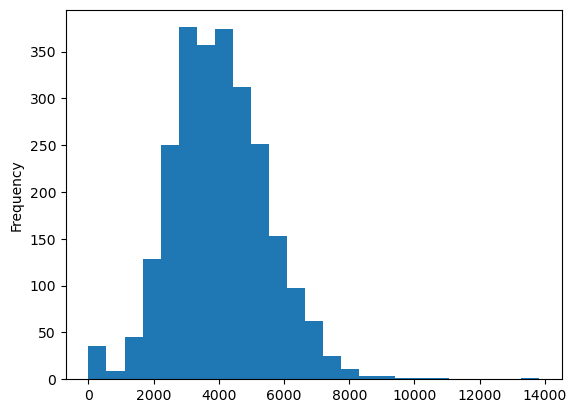

In [53]:
census_race['Total Population'].plot.hist(bins=25)

In [54]:
### Mapping Data

In [82]:
tracts = gpd.read_file('Census_2020.geojson')

In [83]:
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<AxesSubplot: >

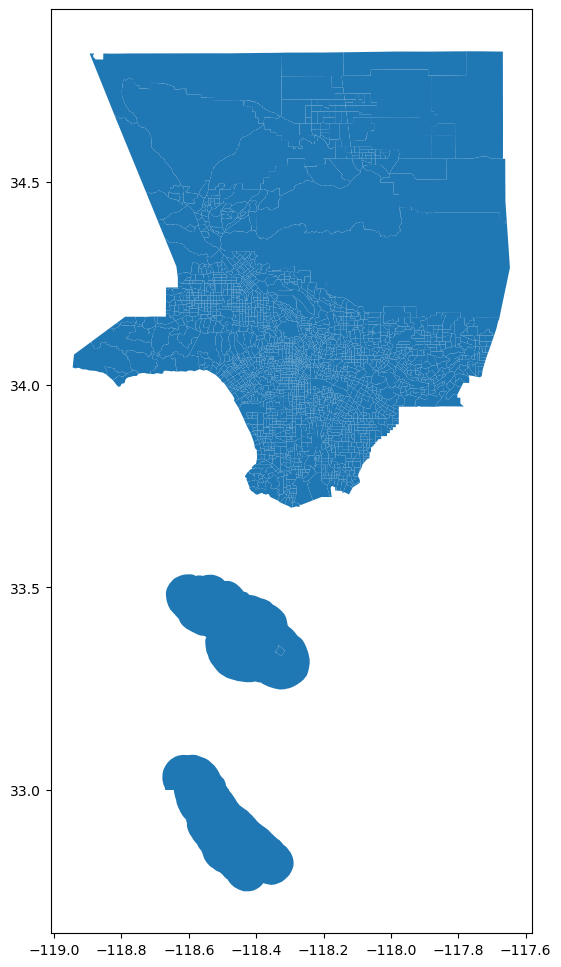

In [59]:
tracts.plot(figsize=(15,12))

In [ ]:
### Merging the Data

In [84]:
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [86]:
tracts2=tracts[['CT20','geometry']]

In [87]:
tracts2.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [91]:
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2495 non-null   int64   
 1   CT20           2495 non-null   object  
 2   LABEL          2495 non-null   object  
 3   ShapeSTArea    2495 non-null   float64 
 4   ShapeSTLength  2495 non-null   float64 
 5   geometry       2495 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


In [92]:
tracts2 = tracts[['CT20','geometry']]

In [94]:
tracts2.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [95]:
tracts['FIPS']='06'+'037'+ tracts['CT20']

In [96]:
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [97]:
tracts_race=tracts.merge(census_race,on="FIPS")

In [98]:
tracts_race.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS,Total Population,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian or Other Pacific Islander,Some or Other Race Alone,Two or More Races
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,3879,2709,11,6,405,0,266,482
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,4247,2980,99,0,607,0,245,316
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,3583,1978,8,90,341,0,607,559
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,3723,2545,97,0,209,0,668,204
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,2690,2404,17,0,131,57,42,39


<AxesSubplot: >

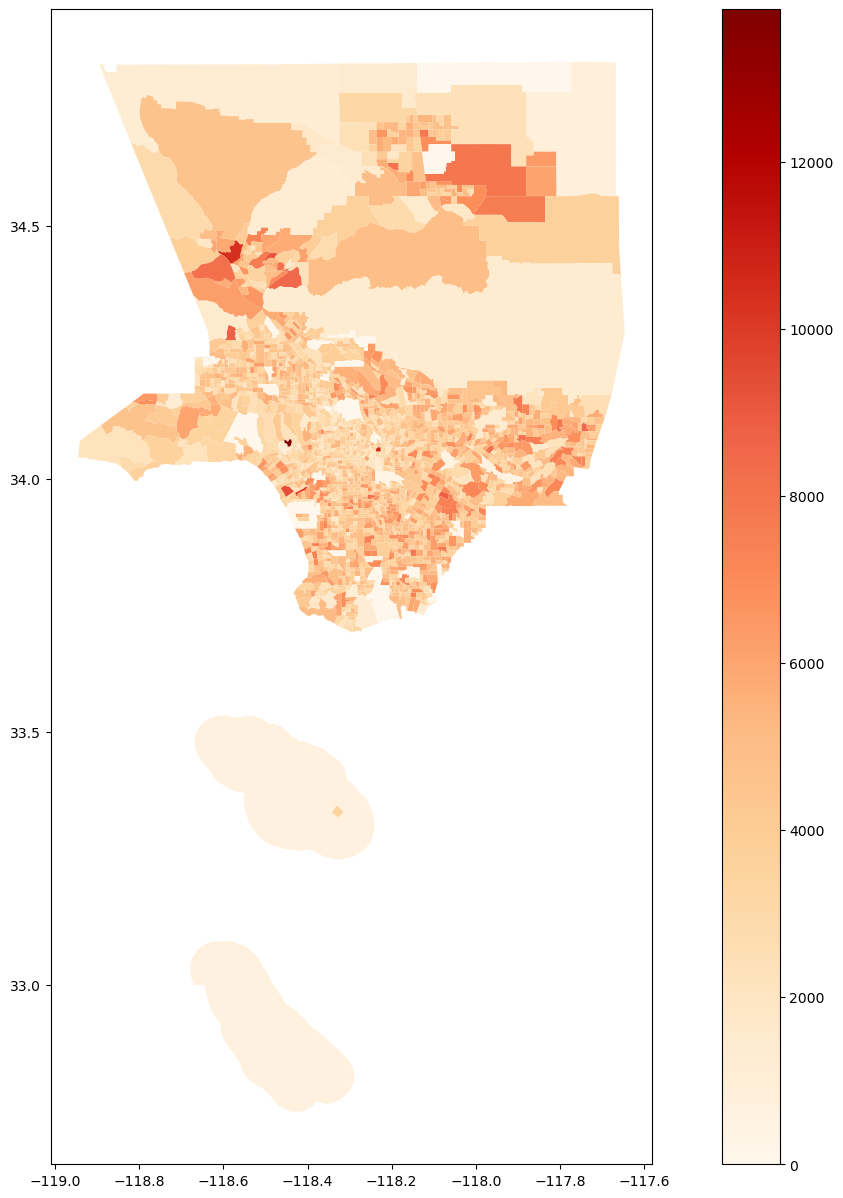

In [105]:
tracts_race.plot(figsize=(18,15),column = 'Total Population',legend=True,cmap='OrRd')

In [106]:
vulnerable=gpd.read_file('vulnerability.geojson')

In [108]:
race_vulnerable=tracts_race.merge(census_race,on="FIPS")

In [109]:
race_vulnerable.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS,Total Population_x,White Alone_x,Black or African American Alone_x,American Indian and Alaska Native Alone_x,Asian Alone_x,Native Hawaiian or Other Pacific Islander_x,Some or Other Race Alone_x,Two or More Races_x,Total Population_y,White Alone_y,Black or African American Alone_y,American Indian and Alaska Native Alone_y,Asian Alone_y,Native Hawaiian or Other Pacific Islander_y,Some or Other Race Alone_y,Two or More Races_y
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,3879,2709,11,6,405,0,266,482,3879,2709,11,6,405,0,266,482
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,4247,2980,99,0,607,0,245,316,4247,2980,99,0,607,0,245,316
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,3583,1978,8,90,341,0,607,559,3583,1978,8,90,341,0,607,559
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,3723,2545,97,0,209,0,668,204,3723,2545,97,0,209,0,668,204
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,2690,2404,17,0,131,57,42,39,2690,2404,17,0,131,57,42,39


<AxesSubplot: >

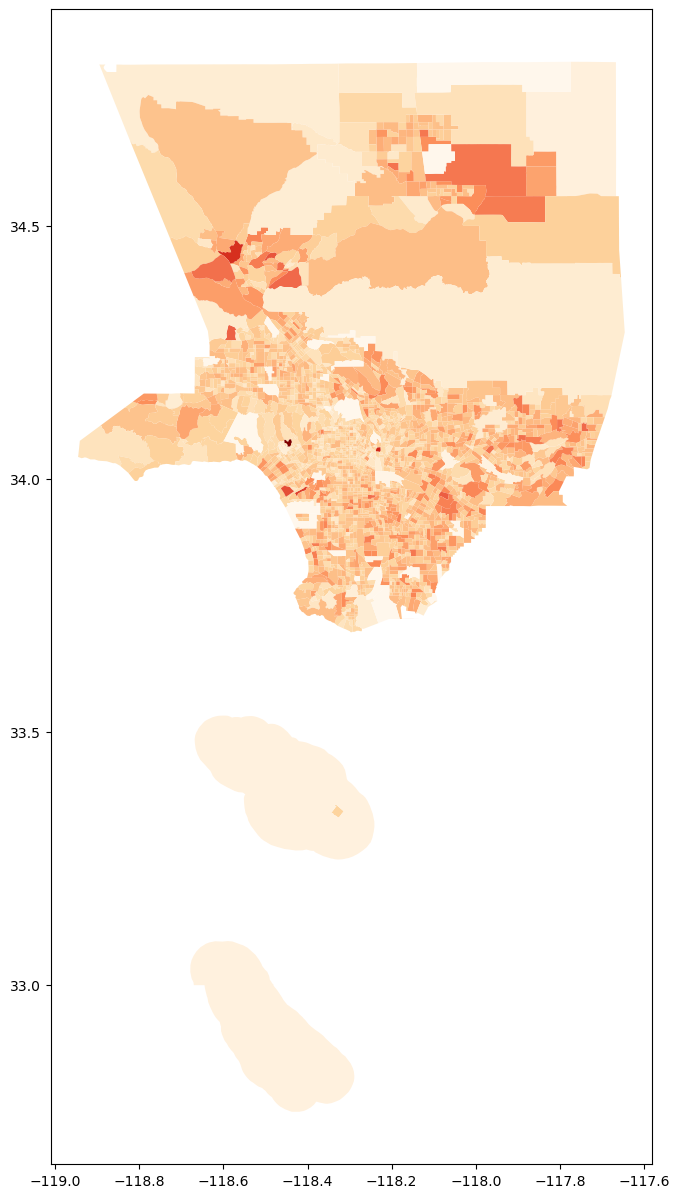

In [114]:
race_vulnerable.plot(figsize=(18,15),column = 'Total Population_x', cmap = 'OrRd')

In [ ]:
### Not too sure what went on here but this should be a map showing the total populations with the Social Vulnerability index layered on top